In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.applications.mobilenet import MobileNet as PretrainedModel,preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import sys,os
from shutil import move,copy
from tensorflow.keras.callbacks import ModelCheckpoint


<h2>Run these only once</h2>

In [3]:
#train and test files
# train_negative = glob("MURA-v1.1/train/*/*/*negative/*.png")
# train_positive = glob("MURA-v1.1/train/*/*/*positive/*.png")

test_negative = glob("MURA-v1.1/valid/*/*/*negative/*.png")
test_positive = glob("MURA-v1.1/valid/*/*/*positive/*.png")


In [4]:
test = []
for el in test_negative:
     #if 'XR_ELBOW' in el:
        test.append(el)
        
for el in test_positive:
     #if 'XR_ELBOW' in el:
        test.append(el)

In [5]:
# make directories
# os.mkdir("data")
# os.mkdir("data/train")
# os.mkdir("data/test")
# os.mkdir("data/train/positive")
# os.mkdir("data/train/negative")
# os.mkdir("data/test/positive")
# os.mkdir("data/test/negative")

In [6]:
# srcs = [train_positive , train_negative , test_positive , test_negative]
# dests = ["data//train//positive//" ,"data//train//negative//" , "data//test//positive//" ,"data//test//negative//" ]

# # now move files
# for src,dest in zip(srcs,dests):
#     for i,file in enumerate(src):
#         move(file,dest)
#         f_name = file.split("\\")[-1]
#         old = dest + f_name
#         new = dest + str(i) + ".png"
#         os.rename(old,new)

<h2>Hyperparameters here !!!!</h2>

In [7]:
IMAGE_SIZE = [224,224] # unified image sizes
epochs = 5 # num of epoch
batch_size = 128 # number of images to consider each epoche

In [8]:
train_path = "data/train"
valid_path = "data/test"

In [9]:
#train and test files
image_files = glob(train_path + "/*/*.png")
valid_image_files = glob(valid_path + "/*/*.png")

In [10]:
# number of classes
folders = glob(train_path + "/*")
folders

['data/train\\negative', 'data/train\\positive']

In [11]:
ptm = PretrainedModel(
    input_shape=IMAGE_SIZE + [3],
    weights = "imagenet",
    include_top = False
)

In [12]:
K = len(folders) # number of classe
x = Flatten()(ptm.output)
#x = Dense(K,activation="softmax")(x)

In [13]:
model = Model(inputs=ptm.input,outputs=x)

In [14]:
# now discription of generator , for appropriate preprocess for vgg , no augmentation
gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [15]:

# create actual generators
train_generator = gen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode="binary",
    shuffle = True
)

valid_generator = gen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode="binary",
    shuffle = False
)

Found 36808 images belonging to 2 classes.
Found 3197 images belonging to 2 classes.


In [16]:
Ntrain = len(image_files)
Nvalid = len(valid_image_files)

# Get size of output
feat = model.predict(np.random.random([1]+IMAGE_SIZE + [3]))
D=feat.shape[1]

X= np.zeros((Ntrain,D))
Y = np.zeros((Ntrain))
x_test = np.zeros((Nvalid,D))
y_test = np.zeros((Nvalid))

In [17]:
# now fill x_train and y_train
i=0
for x,y in train_generator:
    #get features
    features = model.predict(x)
    
    # size of batch (final batch may not = batch_size)
    sz = len(y)
    
    # assign to x_train and y_train
    X[i:i + sz] = features
    Y[i:i + sz] = y
    
    # increment i for next batch
    i+=sz
    print(i)
    if i>=Ntrain:
        print('break i = ' , i)
        break
    

128
256
384
512
640
768
896
1024
1152
1280
1408
1536
1664
1792
1920
2048
2176
2304
2432
2560
2688
2816
2944
3072
3200
3328
3456
3584
3712
3840
3968
4096
4224
4352
4480
4608
4736
4864
4992
5120
5248
5376
5504
5632
5760
5888
6016
6144
6272
6400
6528
6656
6784
6912
7040
7168
7296
7424
7552
7680
7808
7936
8064
8192
8320
8448
8576
8704
8832
8960
9088
9216
9344
9472
9600
9728
9856
9984
10112
10240
10368
10496
10624
10752
10880
11008
11136
11264
11392
11520
11648
11776
11904
12032
12160
12288
12416
12544
12672
12800
12928
13056
13184
13312
13440
13568
13696
13824
13952
14080
14208
14336
14464
14592
14720
14848
14976
15104
15232
15360
15488
15616
15744
15872
16000
16128
16256
16384
16512
16640
16768
16896
17024
17152
17280
17408
17536
17664
17792
17920
18048
18176
18304
18432
18560
18688
18816
18944
19072
19200
19328
19456
19584
19712
19840
19968
20096
20224
20352
20480
20608
20736
20864
20992
21120
21248
21376
21504
21632
21760
21888
22016
22144
22272
22400
22528
22656
22784
22912
23040
23168

In [18]:
# now fill x_train and y_train
i=0
for x,y in valid_generator:
    #get features
    features = model.predict(x)
    
    # size of batch (final batch may not = batch_size)
    sz = len(y)
    
    # assign to x_train and y_train
    x_test[i:i + sz] = features
    y_test[i:i + sz] = y
    
    # increment i for next batch
    i+=sz
    print(i)
    if i>=Nvalid:
        print('break i = ' , i)
        break
    

128
256
384
512
640
768
896
1024
1152
1280
1408
1536
1664
1792
1920
2048
2176
2304
2432
2560
2688
2816
2944
3072
3197
break i =  3197


In [19]:
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
X, Y, test_size=0.1, random_state=42)

In [20]:
i = Input(shape=(D,))
x=Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu')(i)
x=Dropout(0.2)(x)
x=Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu')(x)
x=Dropout(0.2)(x)
x=Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu')(x)
x=Dropout(0.2)(x)
x=Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu')(x)
#x=Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)

In [21]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics = ["accuracy"]
)

In [22]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
r = model.fit(
    x_train,y_train,
    batch_size=128,
    epochs=10,
    validation_data = (x_valid,y_valid),
    callbacks=callbacks_list
)
model.load_weights("weights.best.hdf5")

Train on 33127 samples, validate on 3681 samples
Epoch 1/10
33024/33127 [============================>.] - ETA: 0s - loss: 1.2901 - accuracy: 0.6627
Epoch 00001: val_accuracy improved from -inf to 0.74463, saving model to weights.best.hdf5
33127/33127 [==============================] - 61s 2ms/sample - loss: 1.2885 - accuracy: 0.6629 - val_loss: 0.8031 - val_accuracy: 0.7446
Epoch 2/10
33024/33127 [============================>.] - ETA: 0s - loss: 0.7653 - accuracy: 0.7563
Epoch 00002: val_accuracy improved from 0.74463 to 0.75550, saving model to weights.best.hdf5
33127/33127 [==============================] - 42s 1ms/sample - loss: 0.7654 - accuracy: 0.7561 - val_loss: 0.7428 - val_accuracy: 0.7555
Epoch 3/10
33024/33127 [============================>.] - ETA: 0s - loss: 0.6770 - accuracy: 0.7910
Epoch 00003: val_accuracy improved from 0.75550 to 0.77642, saving model to weights.best.hdf5
33127/33127 [==============================] - 34s 1ms/sample - loss: 0.6769 - accuracy: 0.7910 

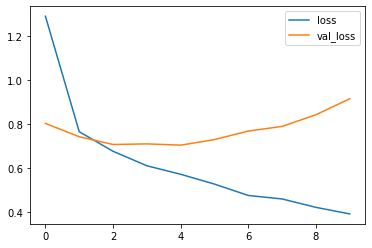

In [23]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

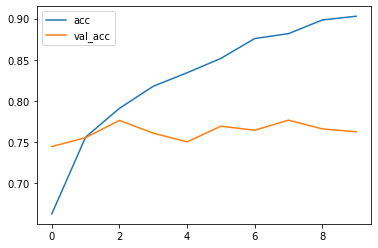

In [24]:
plt.plot(r.history["accuracy"],label="acc")
plt.plot(r.history["val_accuracy"],label="val_acc")
plt.legend()

In [29]:
pred = model.predict(x_test)
Me = []
Them = []
prev = ''
acc = []
labeled = False
for a,b,c in zip(test,pred,y_test):
    name = a.split('\\')[2]
    if name == prev or prev == '':
        acc.append(float(b[0]))
        if labeled == False:
            Them.append(c)
            labeled = True
        prev = name
    else:
        p = sum(acc)/len(acc)
        p = round(p,0)
        Me.append(p)
        labeld = False
        acc = []
        acc.append(b[0])
        prev = name
        Them.append(c)
        labeled = True
        
p = sum(acc)/len(acc)
p = round(p,0)
Me.append(p)
# Them.append(c)
acc = []
acc.append(b)
prev = name

In [30]:
Me = np.array(Me)
Them = np.array(Them)
print("Accuracy: " ,np.mean(Me == Them))

Accuracy:  0.8038029386343993


In [33]:
PP = NN = PN = NP = 0
for a,b in zip(Me,Them):
    if a==b and a==1 :
        PP+=1
        
    if a==b and a==0 :
        NN+=1
        
    if a!=b and a==1 :
        PN+=1
        
    if a!=b and a==0 :
        NP+=1
        
print(PP,NN,PN,NP)
p0 = (PP +NN)/(PP+NN+PN+NP)
py = (PP +PN)/(PP+NN+PN+NP) * (PP +NP)/(PP+NN+PN+NP)
pn = (NP +NN)/(PP+NN+PN+NP) * (PN +NN)/(PP+NN+PN+NP)
pe = py+pn 
kappa = (p0-pe)/(1-pe)
print('+++++kappa',kappa)

383 547 84 143
+++++kappa 0.6006201177889258
